In [1]:
# Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Mengimport Data
df = pd.read_csv('data.csv')

In [5]:
# Melihat 5 data pertama
df.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65


In [10]:
# Membuat salinan dataframe dengan 2 kolom attack dan defense
df2 = df[['Name','Attack','Defense']]

In [11]:
df2.head()

,Name,Attack,Defense
0,Bulbasaur,49,49
1,Ivysaur,62,63
2,Venusaur,82,83
3,Venusaur Mega Venusaur,100,123
4,Charmander,52,43


In [12]:
# Mentransformasi data dengan cara standarisasi
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df2[['Attack','Defense']])
df_std

array([[-8.49267895e-01, -7.20998146e-01],
       [-4.01184435e-01, -2.18256838e-01],
       [ 2.88174735e-01,  4.99945030e-01],
       [ 9.08597987e-01,  1.93634877e+00],
       [-7.45864020e-01, -9.36458706e-01],
       [-3.32248518e-01, -3.97807305e-01],
       [ 3.57110652e-01,  3.20394563e-01],
       [ 1.94263674e+00,  1.50542765e+00],
       [ 1.04646982e+00,  3.20394563e-01],
       [-8.83735853e-01, -1.46436651e-01],
       [-3.66716476e-01,  3.92214750e-01],
       [ 3.22642693e-01,  1.11041662e+00],
       [ 1.01200186e+00,  1.82861849e+00],
       [-1.50415911e+00, -1.22373945e+00],
       [-1.84883869e+00, -5.05537585e-01],
       [-9.87139729e-01, -6.85088053e-01],
       [-1.33181931e+00, -1.40328992e+00],
       [-1.67649890e+00, -6.85088053e-01],
       [ 5.63918403e-01, -1.04418899e+00],
       [ 2.63199591e+00, -1.04418899e+00],
       [-9.87139729e-01, -1.04418899e+00],
       [-4.70120352e-01, -5.05537585e-01],
       [ 2.19238818e-01,  2.12664283e-01],
       [ 2.

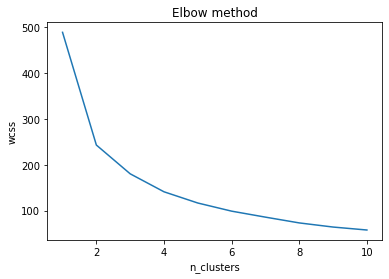

In [13]:
# Mencari jumlah gerombol terbentuk yang terbaik dengan metode elbow
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

- Dari output elbow method di atas, dapat dilihat bahwa jumlah gerombol terbaik yang terbentuk atau k yaitu sebesar 2 gerombol, dilihat dari garis plot membentuk siku di jumlah gerombol sebanyak 2.

[1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0
 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0
 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1
 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1]
       Attack   Defense  label1_kmeans
0   -0.849268 -0.720998              1
1   -0.401184 -0.218257              1
2    0.288175  0.499945              0
3    0.908598  1.936349              0
4   -0.745864 -0.936459              1
..        ...       ...            ...
239 -0.297781 -0.325987              1
240 -0.297781  1.469518              0
241  0.391579 -0.972369              1
242  0.046899  0.392215              0
243 -0.470120 -0.325987              1

[244 rows x 3 columns]


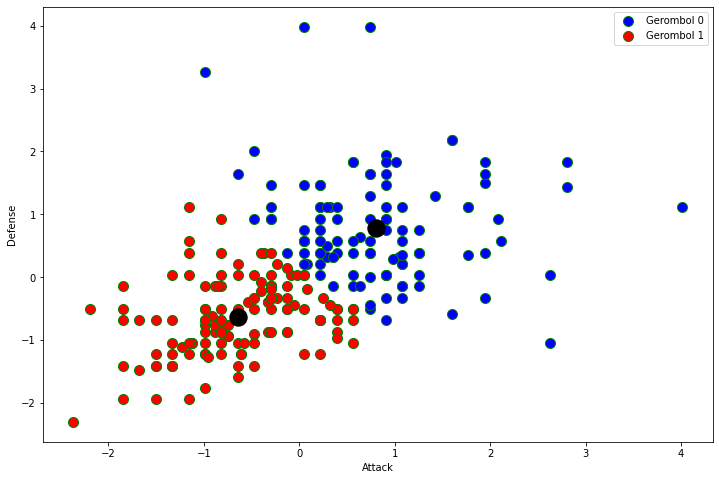

In [14]:
# Melakukan analiis klustering dengan metode KMeans dan K = 2
kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
print(labels1)

new_df = pd.DataFrame(data=df_std, columns=['Attack','Defense'])
new_df['label1_kmeans'] = labels1
print(new_df)

plt.figure(figsize=(12,8))

plt.scatter(new_df['Attack'][new_df.label1_kmeans==0], new_df['Defense'][new_df.label1_kmeans==0], label='Gerombol 0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Attack'][new_df.label1_kmeans==1], new_df['Defense'][new_df.label1_kmeans==1], label='Gerombol 1', c='red', s=100, edgecolors='green')

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], c='k', s=300)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend()
plt.show()

- Dari output scatterplot hasil penggorombolan variabel Attack dan Defense di atas, dapat dilihat bahwa jumlah gerombol yang terbentuk sebanyak 2 gerombol. Dimana gerombol 0 berwarna biru dan gerombol 1 berwarna merah dan pusat gerombol atau centroid tiap gerombol berwarna hitam. 
- Hasil penggerombolan ini dapat memisahkan 2 gerombol dengan baik, karena tidak adanya data yang tumpang tindih atau overlapping.
- Gerombol 0 memiliki karakteristik pokemon dengan Attack dan Defense yang lebih besar dibandingkan dengan pokemon pada gerombol 1. 

In [28]:
# Menghitung evaluasi hasil penggerombolan dengan metode silhoutte score
from sklearn.metrics import silhouette_score
print(silhouette_score(df_std, labels= labels1))

0.4383097033394324


- Nilai silhoutte score pada penggerombolan pokemon dengan variabel attack dan defend menjadi 2 gerombol adalah 0.438.
- Nilai silhoutte score memiliki interval 0-1, dengan semakin mendekati 1 menandakan bahwa hasil penggerombolan semakin baik.

In [22]:
# Menggabungkan kolom label penggerombolan dengan dataset pertama
df3 = pd.merge(df, new_df.label1_kmeans, how='outer', left_index=True, right_index=True)

df3['label1_kmeans'] = df3['label1_kmeans'].astype('object')
df3.rename(columns={'label1_kmeans':'Gerombol'}, inplace=True)

In [23]:
Gerombol_0 = df3[df3['Gerombol']==0]
Gerombol_0
Gerombol_0.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.00000,108.000000,108.000000
mean,97.722222,492.231481,75.250000,96.935185,91.009259,77.37963,78.268519,73.388889
std,51.656456,89.224866,21.469006,23.086296,23.793306,34.97869,23.716632,30.185357
min,3.000000,300.000000,30.000000,45.000000,40.000000,10.00000,25.000000,20.000000
25%,61.250000,446.500000,60.750000,80.000000,76.500000,55.00000,65.000000,50.000000
50%,103.000000,495.000000,78.000000,95.000000,85.000000,70.00000,80.000000,70.000000
75%,140.250000,530.000000,90.000000,105.000000,101.250000,100.00000,95.000000,96.250000
max,199.000000,780.000000,160.000000,190.000000,180.000000,194.00000,130.000000,150.000000


In [24]:
Gerombol_1= df3[df3['Gerombol']==1]
Gerombol_1
Gerombol_1.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,93.286765,353.852941,57.367647,55.139706,51.661765,62.419118,61.088235,66.176471
std,60.903191,90.000867,27.113154,17.887787,16.202981,29.335494,23.046964,29.626035
min,1.000000,180.000000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000
25%,39.750000,293.750000,40.000000,45.000000,40.000000,40.000000,45.000000,44.500000
50%,83.500000,329.000000,55.000000,55.000000,50.000000,55.000000,55.000000,65.000000
75%,153.500000,413.000000,65.000000,65.000000,63.250000,80.000000,80.000000,90.000000
max,200.000000,600.000000,250.000000,90.000000,100.000000,175.000000,120.000000,150.000000


- Pada output analisis deskriptif gerombol 0 dan 1 di atas, dapat dilihat bahwa gerombol 0 memiliki karaktetistik pokemon yang memiliki rata-rata jumlah HP, Attack, Defense, Attack Speed, Defense Speed, dan Speed yang lebih besar daripada pokemon pada gerombol 1. Mungkin dapat dikategorikan bahwa gerombol 0 adalah pokemon dengan kategori pokemon yang kuat/overpower sedangkan pokemon pada gerombol 1 dikategorikan dengan pokemon yang lemah/underrated.

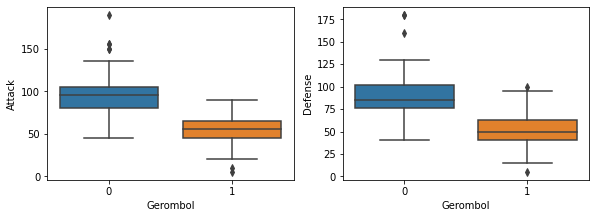

In [25]:
# Menampilkan boxplot Attack dan Defense pada setiap gerombol
fig = plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
sns.boxplot(x='Gerombol', y='Attack', data=df3)
plt.subplot(2,3,2)
sns.boxplot(x='Gerombol', y='Defense', data=df3);


- Pada boxplot di atas dapat dilihat bahwa rataan/nilai tengah boxplot attack dan defense pada gerombol 0 lebih besar dibandingkan dengan gerombol 1.
- Variabel Attack dan Defence pada setiap gerombol masih terdapat nilai pencilan.